### Project Title: Social Media Sentiment Analysis
This project aims to analyze sentiments expressed on social media by classifying posts into different sentiment categories. The dataset includes features such as text content, timestamps, and user engagement metrics. The target variable represents the sentiment label of each post. The objective is to utilize machine learning models to accurately determine the sentiment of social media content, enhancing understanding of public opinion and trends.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from transformers import pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
# Drop unnecessary columns

df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0", "Timestamp"], inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   User       732 non-null    object 
 3   Platform   732 non-null    object 
 4   Hashtags   732 non-null    object 
 5   Retweets   732 non-null    float64
 6   Likes      732 non-null    float64
 7   Country    732 non-null    object 
 8   Year       732 non-null    int64  
 9   Month      732 non-null    int64  
 10  Day        732 non-null    int64  
 11  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 68.8+ KB


In [5]:
df.isnull().sum()

Text         0
Sentiment    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [6]:
df.duplicated().sum()

20

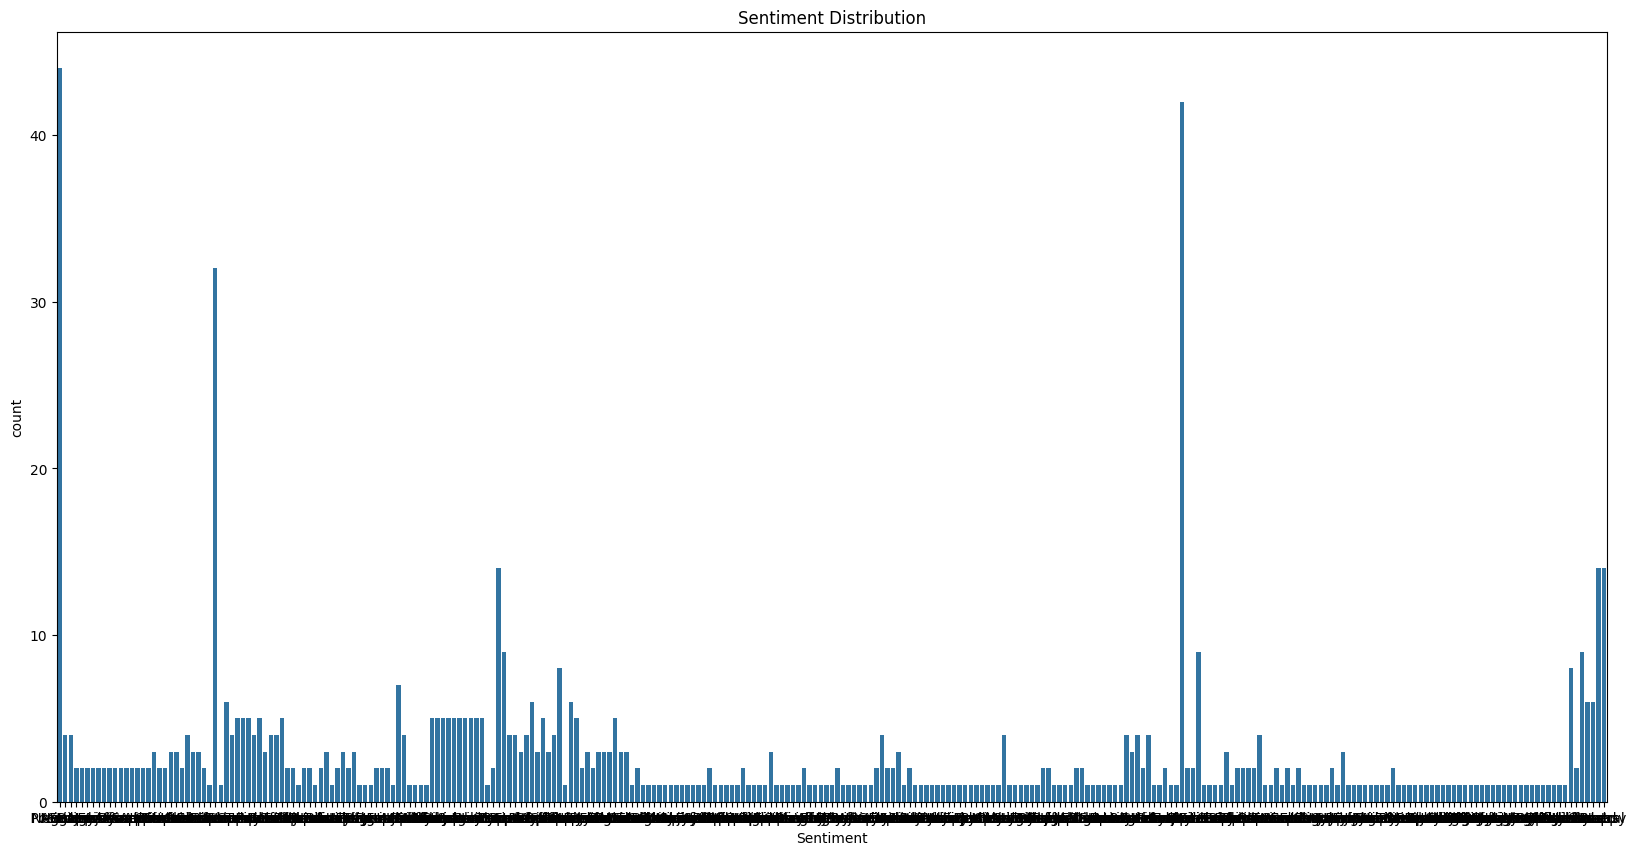

In [7]:
# Countplot for Sentiment Distribution
plt.figure(figsize=(20,10))
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

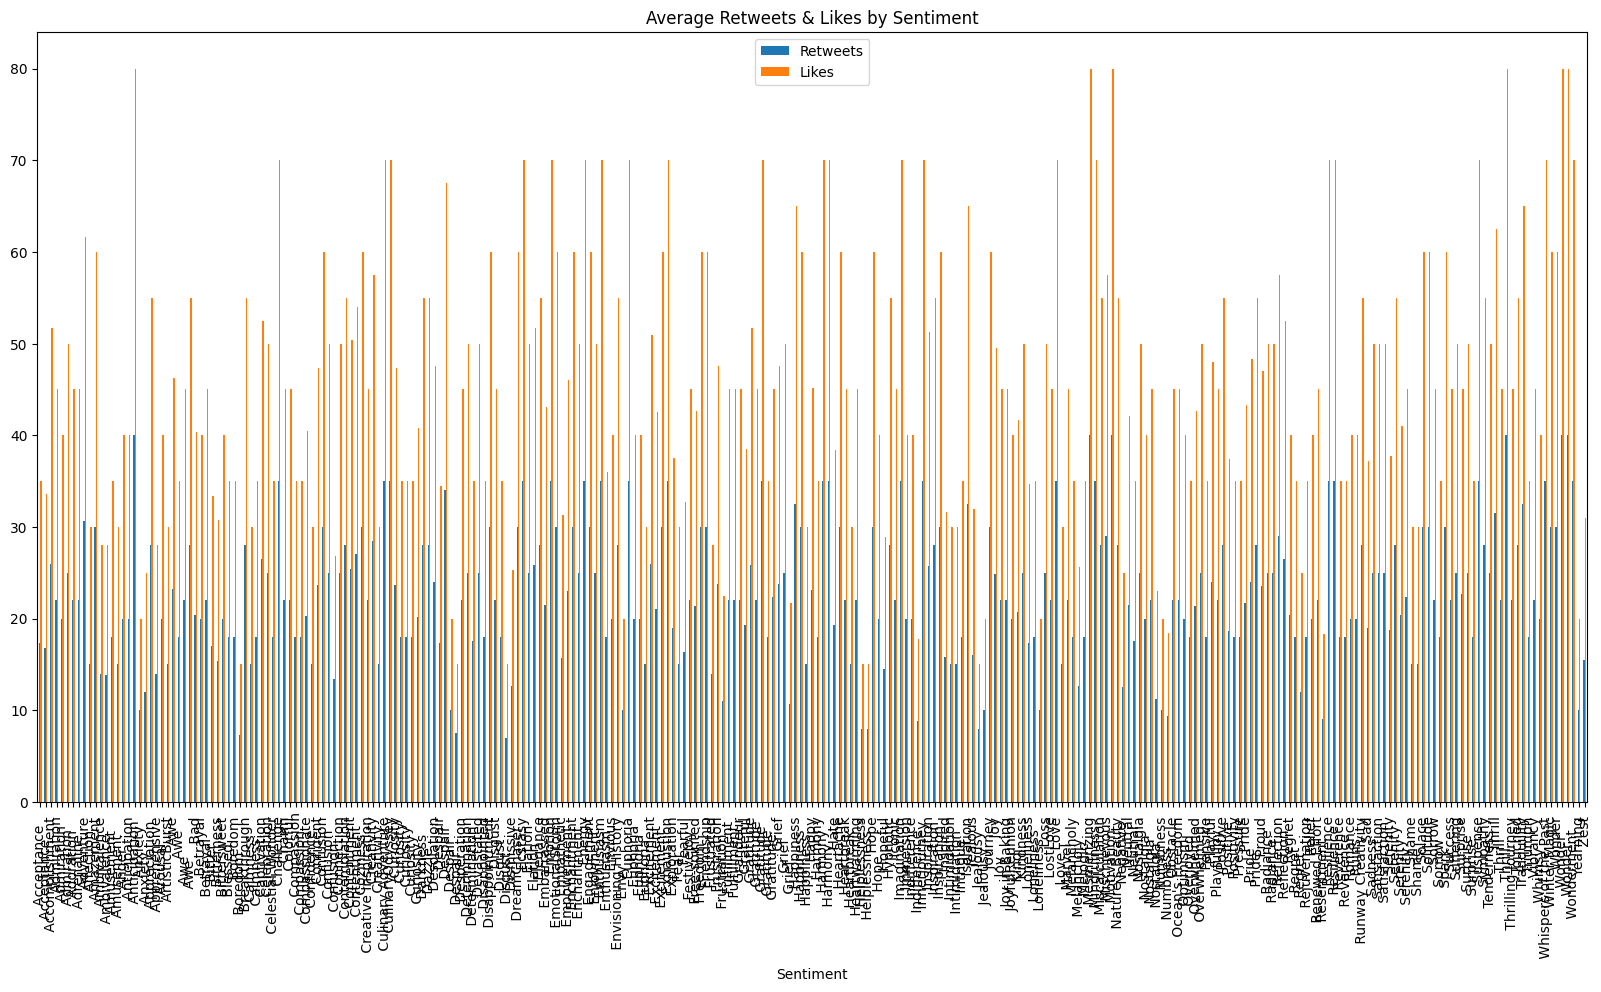

In [8]:
# Group by Sentiment and calculated mean Retweets &	Likes

sentiment_group = df.groupby("Sentiment")[["Retweets",	"Likes"]].mean()

# Barplot for mean Retweets & Likes

sentiment_group.plot(kind='bar', figsize=(20,10))
plt.title("Average Retweets & Likes by Sentiment")
plt.show()

In [9]:
df.shape

(732, 12)

In [10]:
df["Platform"].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [11]:
df["Platform"] = df["Platform"].str.strip()

In [12]:
df["Hashtags"].unique()

array([' #Nature #Park                            ',
       ' #Traffic #Morning                        ',
       ' #Fitness #Workout                        ',
       ' #Travel #Adventure                       ',
       ' #Cooking #Food                           ',
       ' #Gratitude #PositiveVibes              ',
       ' #RainyDays #Cozy                         ',
       ' #MovieNight #MustWatch                  ',
       ' #Politics #Debate                       ',
       ' #Summer #BeachDays                      ',
       ' #Blogging #NewPost                      ',
       ' #SickDay #Health                        ',
       ' #CityExplore #HiddenGems                ',
       ' #NewYear #FitnessGoals                  ',
       ' #Tech #Innovation                       ',
       ' #Reflection #Future                     ',
       ' #PetAdoption #FurryFriend               ',
       ' #Gaming #LateNight                      ',
       ' #AI #TechConference                     ',
       

In [13]:
df["Hashtags"] = df["Hashtags"].str.strip()

In [14]:
df["User"].unique()

array([' User123      ', ' CommuterX    ', ' FitnessFan   ',
       ' AdventureX   ', ' ChefCook     ', ' GratitudeNow ',
       ' RainyDays    ', ' MovieBuff    ', ' DebateTalk   ',
       ' BeachLover   ', ' BloggerX     ', ' WellnessCheck',
       ' UrbanExplorer', ' FitJourney   ', ' TechEnthusiast',
       ' Reflections  ', ' PetAdopter   ', ' GamerX       ',
       ' TechConference', ' WinterBlues  ', ' Bookworm     ',
       ' VRExplorer   ', ' ProductivityPro', ' FitnessWarrior',
       ' CareerMilestone', ' BrunchBuddy  ', ' LanguageLearner',
       ' BookLover    ', ' MentalHealthMatters', ' ArtistInAction',
       ' RoadTripper  ', ' SunsetWatcher', ' CodeEnthusiast',
       ' WorkshopAttendee', ' WinterSports  ', ' FamilyTime   ',
       ' MusicLover   ', ' MindfulMoments', ' DessertExplorer',
       ' GamingEnthusiast', ' GardenPlanner ', ' BirthdayBash ',
       ' ProductivityWin', ' MovieNight   ', ' ArtExplorer  ',
       ' BookwormX    ', ' VRMeetup     ', ' NatureLove

In [15]:
df["User"] = df["User"].str.strip()

In [16]:
df["Country"].unique()

array([' USA      ', ' Canada   ', ' USA        ', ' UK       ',
       ' Australia ', ' India    ', ' USA    ', 'USA', ' Canada    ',
       ' USA       ', ' USA ', ' Canada  ', ' UK ', ' India     ',
       ' Canada ', ' UK        ', ' India ', ' UK   ', ' UK         ',
       ' USA     ', ' Canada     ', ' USA          ', ' India      ',
       ' Australia  ', ' UK           ', ' Canada       ',
       ' Australia   ', ' Australia    ', ' UK            ', ' USA   ',
       ' India       ', ' UK          ', ' USA  ', ' UK      ',
       ' Canada      ', ' India   ', ' Canada          ',
       ' India        ', ' Australia     ', ' Canada        ',
       ' India         ', ' USA           ', ' USA               ',
       ' Canada            ', ' UK                ',
       ' India              ', ' Australia          ',
       ' France            ', ' Brazil            ',
       ' Japan             ', ' Greece            ',
       ' India             ', ' Brazil           ', ' Franc

In [17]:
df["Country"] = df["Country"].str.strip()

In [18]:
df["Sentiment"].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [19]:
# Count Unique Sentiments

num_unique_sentiments = df["Sentiment"].nunique()
print("Number Of Unique Sentiments:", num_unique_sentiments)

Number Of Unique Sentiments: 279


In [20]:
# Clean Sentiment Column by removing extra spaces and converting to a consistent case

df["Sentiment"] = df["Sentiment"].str.strip().str.lower()
df["Sentiment"]

0      positive
1      negative
2      positive
3      positive
4       neutral
         ...   
727       happy
728       happy
729       happy
730       happy
731       happy
Name: Sentiment, Length: 732, dtype: object

In [21]:
# Display All Unique Sentiments


unique_sentiments = df["Sentiment"].unique().tolist()
print(unique_sentiments)

['positive', 'negative', 'neutral', 'anger', 'fear', 'sadness', 'disgust', 'happiness', 'joy', 'love', 'amusement', 'enjoyment', 'admiration', 'affection', 'awe', 'disappointed', 'surprise', 'acceptance', 'adoration', 'anticipation', 'bitter', 'calmness', 'confusion', 'excitement', 'kind', 'pride', 'shame', 'elation', 'euphoria', 'contentment', 'serenity', 'gratitude', 'hope', 'empowerment', 'compassion', 'tenderness', 'arousal', 'enthusiasm', 'fulfillment', 'reverence', 'despair', 'grief', 'loneliness', 'jealousy', 'resentment', 'frustration', 'boredom', 'anxiety', 'intimidation', 'helplessness', 'envy', 'regret', 'curiosity', 'indifference', 'numbness', 'melancholy', 'nostalgia', 'ambivalence', 'determination', 'zest', 'hopeful', 'proud', 'grateful', 'empathetic', 'compassionate', 'playful', 'free-spirited', 'inspired', 'confident', 'bitterness', 'yearning', 'fearful', 'apprehensive', 'overwhelmed', 'jealous', 'devastated', 'frustrated', 'envious', 'dismissive', 'thrill', 'bitterswee

##### Total Sentiments

[' Positive ', ' Negative ', ' Neutral ', ' Anger ', ' Fear ', ' Sadness ', ' Disgust ', ' Happiness ', ' Joy ', ' Love ', ' Amusement ', ' Enjoyment ', ' Admiration ', ' Affection ', ' Awe ', ' Disappointed ', ' Surprise ', ' Acceptance ', ' Adoration ', ' Anticipation ', ' Bitter ', ' Calmness ', ' Confusion ', ' Excitement ', ' Kind ', ' Pride ', ' Shame ', ' Confusion ', ' Excitement ', ' Shame ', ' Elation ', ' Euphoria ', ' Contentment ', ' Serenity ', ' Gratitude ', ' Hope ', ' Empowerment ', ' Compassion ', ' Tenderness ', ' Arousal ', ' Enthusiasm ', ' Fulfillment ', ' Reverence ', ' Compassion', ' Fulfillment ', ' Reverence ', ' Elation ', ' Despair ', ' Grief ', ' Loneliness ', ' Jealousy ', ' Resentment ', ' Frustration ', ' Boredom ', ' Anxiety ', ' Intimidation ', ' Helplessness ', ' Envy ', ' Regret ', ' Disgust ', ' Despair ', ' Loneliness ', ' Frustration ', ' Anxiety ', ' Intimidation ', ' Helplessness ', ' Jealousy ', ' Curiosity ', ' Indifference ', ' Confusion ', ' Numbness ', ' Melancholy ', ' Nostalgia ', ' Ambivalence ', ' Acceptance ', ' Determination ', ' Serenity ', ' Numbness ', ' Zest ', ' Contentment ', ' Hopeful ', ' Proud ', ' Grateful ', ' Empathetic ', ' Compassionate ', ' Playful ', ' Free-spirited ', ' Inspired ', ' Confident ', ' Serenity ', ' Curiosity ', ' Ambivalence ', ' Despair ', ' Bitterness ', ' Yearning ', ' Fearful ', ' Apprehensive ', ' Overwhelmed ', ' Jealous ', ' Devastated ', ' Frustrated ', ' Envious ', ' Dismissive ', ' Awe ', ' Determination ', ' Nostalgia ', ' Thrill ', ' Calmness ', ' Overwhelmed ', ' Gratitude ', ' Bittersweet ', ' Curiosity ', ' Admiration ', ' Overjoyed ', ' Inspiration ', ' Motivation ', ' Amusement ', ' Contemplation ', ' JoyfulReunion ', ' Excitement ', ' Satisfaction ', ' Blessed ', ' Anticipation ', ' Reflection ', ' Nostalgia ', ' Appreciation ', ' Confidence ', ' Surprise ', ' Accomplishment ', ' Wonderment ', ' Optimism ', ' Pride ', ' Happiness ', ' Curiosity ', ' Enchantment ', ' Intrigue ', ' PlayfulJoy ', ' Mindfulness ', ' DreamChaser ', ' Elegance ', ' Whimsy ', ' Pensive ', ' Thrill ', ' Harmony ', ' Creativity ', ' Radiance ', ' Wonder ', ' Rejuvenation ', ' Inspiration ', ' Coziness ', ' Gratitude ', ' Adventure ', ' Euphoria ', ' Awe ', ' Melodic ', ' FestiveJoy ', ' InnerJourney ', ' Freedom ', ' Dazzle ', ' Adrenaline ', ' Harmony ', ' ArtisticBurst ', ' Radiance ', ' Wonder ', ' Inspiration ', ' CulinaryOdyssey ', ' Euphoria ', ' Curiosity ', ' Resilience ', ' Immersion ', ' Nostalgia ', ' Spark ', ' Gratitude ', ' Marvel ', ' Serenity ', ' Heartbreak ', ' Loneliness ', ' Grief ', ' Despair ', ' Betrayal ', ' Suffering ', ' EmotionalStorm ', ' Regret ', ' Isolation ', ' Disappointment ', ' LostLove ', ' Melancholy ', ' Exhaustion ', ' Sorrow ', ' Darkness ', ' Desperation ', ' Ruins ', ' Desolation ', ' Regret ', ' Grief ', ' Heartbreak ', ' Betrayal ', ' Resilience ', ' Sorrow ', ' Loss ', ' Heartache ', ' Solitude ', ' Joy ', ' Happiness ', ' Enthusiasm ', ' Gratitude ', ' Positivity ', ' Kindness ', ' Friendship ', ' Love ', ' Surprise ', ' Success ', ' Thrill ', ' Reflection ', ' Enchantment ', ' Exploration ', ' Awe ', ' Amazement ', ' Romance ', ' Captivation ', ' Wonder ', ' Tranquility ', ' Grandeur ', ' Emotion ', ' Energy ', ' Celebration ', ' Charm ', ' Ecstasy ', ' Hope ', ' Creativity ', ' Colorful ', ' Pride ', ' Hypnotic ', ' Connection ', ' Iconic ', ' Euphoria ', ' Journey ', ' Engagement ', ' Touched ', ' Suspense ', ' Satisfaction ', ' Admiration ', ' Triumph ', ' Heartwarming ', ' Obstacle ', ' Sympathy ', ' Pressure ', ' Renewed Effort ', ' Miscalculation ', ' Challenge ', ' Solace ', ' Breakthrough ', ' Harmony ', ' Joy in Baking ', ' Envisioning History ', ' Imagination ', ' Vibrancy ', ' Mesmerizing ', ' Culinary Adventure ', ' Winter Magic ', ' Thrilling Journey ', " Nature's Beauty ", ' Celestial Wonder ', ' Creative Inspiration ', ' Runway Creativity ', " Ocean's Freedom ", ' Whispers of the Past ', ' Boredom ', ' Indifference ', ' Disgust ', ' Relief ', ' Positive ', ' Embarrassed ', ' Mischievous ', ' Sad ', ' Hate ', ' Bad ', ' Neutral ', ' Happy ']

In [22]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [23]:
pip install transformers

In [24]:
# Initializing Sentiment Analysis Model

classifier = pipeline("sentiment-analysis", framework="tf")  

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


##### The model is loaded from the Hugging Face Transformers library and is used to predict the sentiment of a given text. The sentiment analysis model is initialized using the pipeline function with the "sentiment-analysis" task and the "tf" framework.

In [25]:
# Performing Sentiment Analysis on "Sentiment" column

sentiments = classifier(df["Text"].tolist())

##### The sentiment analysis model is used to predict the sentiment of each text in the "Text" column of the dataframe. The predictions are stored in the "sentiments" variable as a list of dictionaries, where each dictionary contains the predicted sentiment label and score for a given text.

In [26]:
# Extract Sentiment Labels & Scores

sentiment_labels = [result['label'] for result in sentiments]

sentiment_scores = [result['score'] for result in sentiments]


# Add results to the orginal dataframe

df["Predicted_Sentiment_Label"] = sentiment_labels

df["Predicted_Sentiment_Score"] = sentiment_scores



##### The sentiment labels and scores are extracted from the "sentiments" list and added as new columns to the original dataframe using the "Predicted_Sentiment_Label" and "Predicted_Sentiment_Score" column names.

In [27]:
df.head(5)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Predicted_Sentiment_Label,Predicted_Sentiment_Score
0,Enjoying a beautiful day at the park! ...,positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,POSITIVE,0.999890
1,Traffic was terrible this morning. ...,negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,NEGATIVE,0.998830
2,Just finished an amazing workout! 💪 ...,positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,POSITIVE,0.999150
3,Excited about the upcoming weekend getaway! ...,positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,POSITIVE,0.999671
4,Trying out a new recipe for dinner tonight. ...,neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,NEGATIVE,0.835425


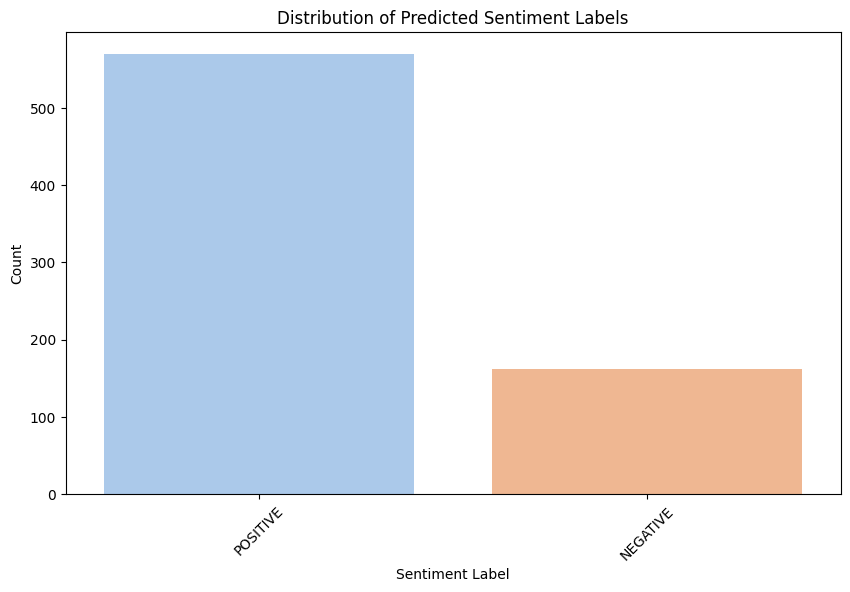

In [28]:
# Distribution of Predicted Sentiments label

plt.figure(figsize=(10,6))
sns.countplot(x= "Predicted_Sentiment_Label", data=df, palette= 'pastel')
plt.title('Distribution of Predicted Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x600 with 0 Axes>

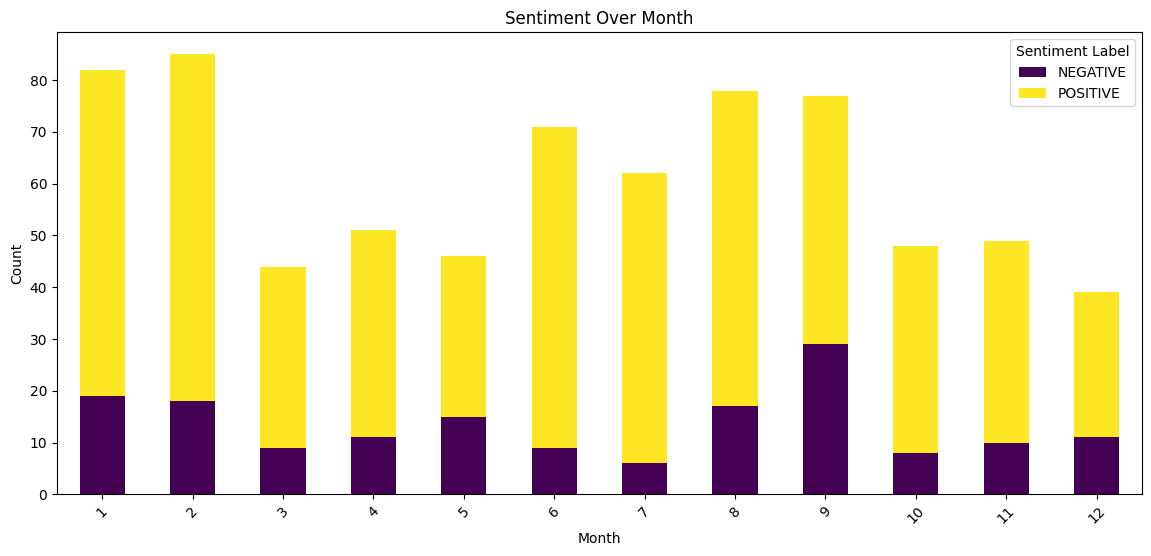

In [29]:
# Count of sentiments over month
plt.figure(figsize=(14, 6))
sentiment_over_Month = df.groupby(['Month', 'Predicted_Sentiment_Label']).size().unstack()
sentiment_over_Month.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 6))
plt.title('Sentiment Over Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.show()

<Figure size 1400x600 with 0 Axes>

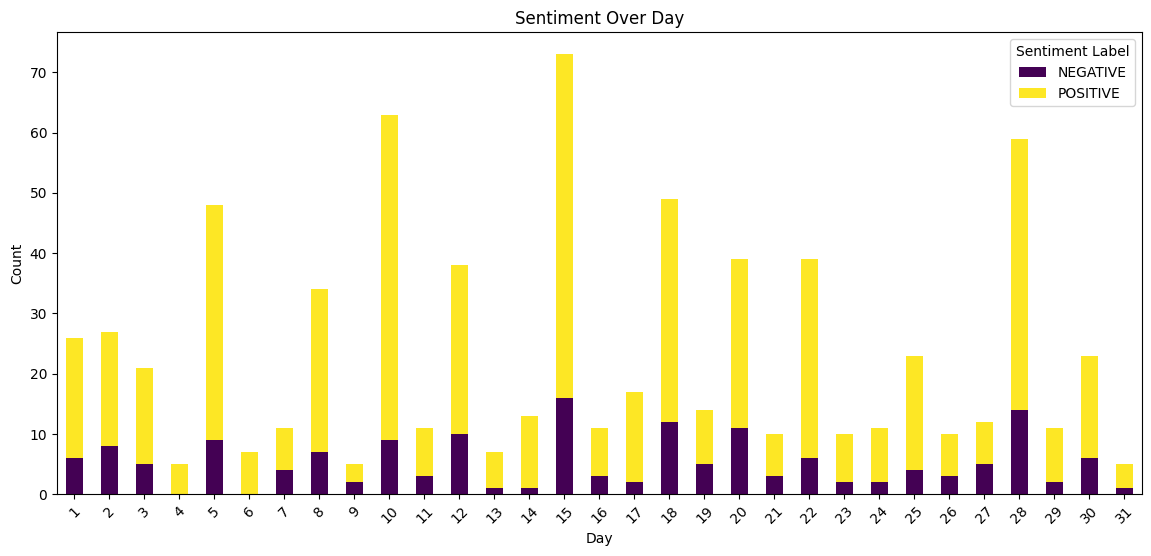

In [30]:
# Count of sentiment over day

plt.figure(figsize=(14,6))
sentiment_over_day = df.groupby(["Day", "Predicted_Sentiment_Label"]).size().unstack()
sentiment_over_day.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,6))
plt.title('Sentiment Over Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.show()


<Figure size 1400x600 with 0 Axes>

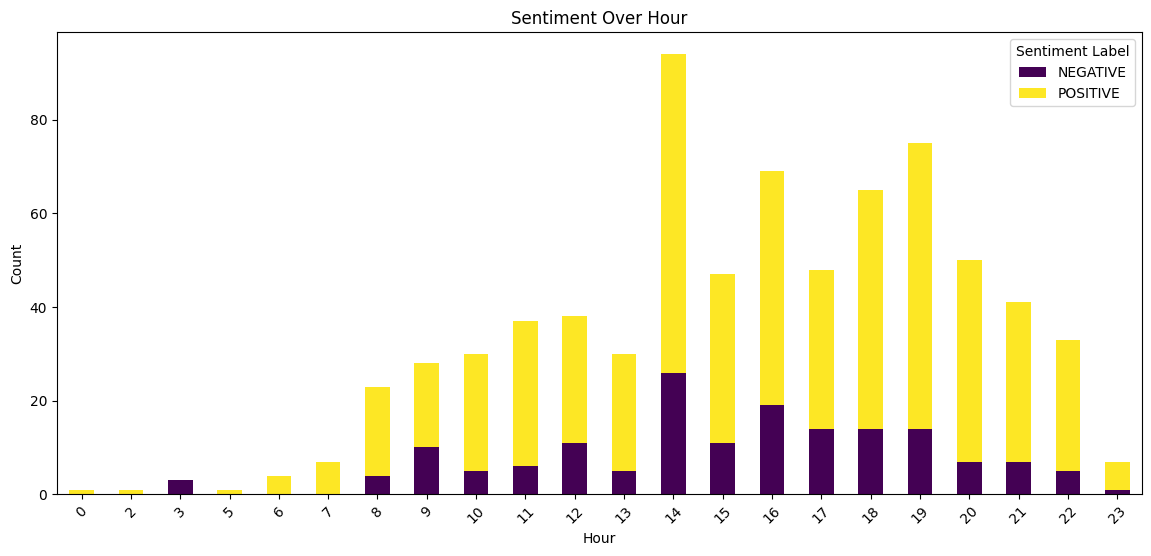

In [31]:
# Count of sentiment over Hour

plt.figure(figsize=(14,6))
sentiment_over_hour = df.groupby(["Hour", "Predicted_Sentiment_Label"]).size().unstack()
sentiment_over_hour.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,6))
plt.title('Sentiment Over Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.show()


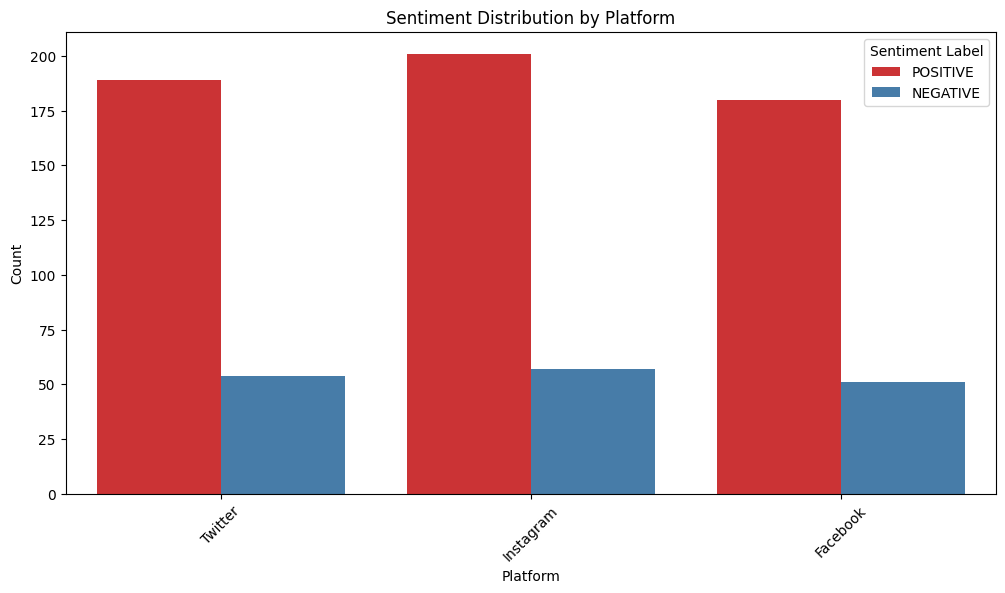

In [32]:
# Sentiment by platform

plt.figure(figsize=(12,6))
sns.countplot(x= "Platform", data = df,hue = "Predicted_Sentiment_Label", palette = 'Set1')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.show()

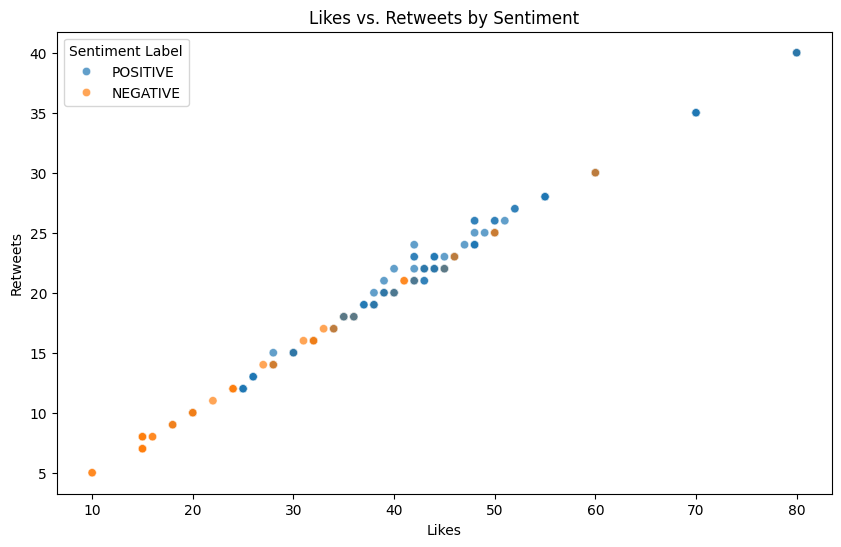

In [33]:
# Sentiment & Engagement

# Scatter plot of likes vs. retweets colored by sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Likes', y='Retweets', hue='Predicted_Sentiment_Label', alpha=0.7)
plt.title('Likes vs. Retweets by Sentiment')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.legend(title='Sentiment Label')
plt.show()

In [34]:
df.isnull().sum()

Text                         0
Sentiment                    0
User                         0
Platform                     0
Hashtags                     0
Retweets                     0
Likes                        0
Country                      0
Year                         0
Month                        0
Day                          0
Hour                         0
Predicted_Sentiment_Label    0
Predicted_Sentiment_Score    0
dtype: int64

In [35]:
df["Year"].unique()

array([2023, 2010, 2021, 2011, 2022, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

In [36]:
df["Hashtags"].value_counts()

Hashtags
#Playful #CarnivalEscapade                     3
#Hopeful #SeedsOfOptimism                      3
#Proud #ScalingPeaks                           3
#Compassionate #TearsOfEmpathy                 3
#Numbness #EmotionalShield                     2
                                              ..
#Curiosity #SeekerOfKnowledge                  1
#Confusion #LabyrinthOfThoughts                1
#Melancholy #WistfulYearning                   1
#Nostalgia #PhotoAlbumStories                  1
#VirtualEntertainment #HighSchoolPositivity    1
Name: count, Length: 692, dtype: int64

In [37]:
# Frequency Encoding for Country,User and Hashtags

df["User_Frequency"] = df["User"].map(df["User"].value_counts())

df["Hashtags_Frequency"] = df["Hashtags"].map(df["Hashtags"].value_counts())

df["Country_Frequency"] = df["Country"].map(df["Country"].value_counts())

df.head(3)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Predicted_Sentiment_Label,Predicted_Sentiment_Score,User_Frequency,Hashtags_Frequency,Country_Frequency
0,Enjoying a beautiful day at the park! ...,positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,POSITIVE,0.99989,1,1,188
1,Traffic was terrible this morning. ...,negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,NEGATIVE,0.99883,1,1,135
2,Just finished an amazing workout! 💪 ...,positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,POSITIVE,0.99915,1,1,188


In [38]:
df.drop(columns = ["Country", "User", "Hashtags", "Sentiment"], inplace=True)

In [39]:
# One Hot Encoding for Platform column

df = pd.get_dummies(df, columns = ["Platform"], drop_first=True)
df.head(3)

,Text,Retweets,Likes,Year,Month,Day,Hour,Predicted_Sentiment_Label,Predicted_Sentiment_Score,User_Frequency,Hashtags_Frequency,Country_Frequency,Platform_Instagram,Platform_Twitter
0,Enjoying a beautiful day at the park! ...,15.0,30.0,2023,1,15,12,POSITIVE,0.99989,1,1,188,False,True
1,Traffic was terrible this morning. ...,5.0,10.0,2023,1,15,8,NEGATIVE,0.99883,1,1,135,False,True
2,Just finished an amazing workout! 💪 ...,20.0,40.0,2023,1,15,15,POSITIVE,0.99915,1,1,188,True,False


In [40]:
df["Predicted_Sentiment_Label"].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [41]:
df["Platform_Instagram"] = df["Platform_Instagram"].astype(int)
df["Platform_Twitter"] = df["Platform_Twitter"].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Text                       732 non-null    object 
 1   Retweets                   732 non-null    float64
 2   Likes                      732 non-null    float64
 3   Year                       732 non-null    int64  
 4   Month                      732 non-null    int64  
 5   Day                        732 non-null    int64  
 6   Hour                       732 non-null    int64  
 7   Predicted_Sentiment_Label  732 non-null    object 
 8   Predicted_Sentiment_Score  732 non-null    float64
 9   User_Frequency             732 non-null    int64  
 10  Hashtags_Frequency         732 non-null    int64  
 11  Country_Frequency          732 non-null    int64  
 12  Platform_Instagram         732 non-null    int32  
 13  Platform_Twitter           732 non-null    int32  

In [43]:
df.columns

Index(['Text', 'Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour',
       'Predicted_Sentiment_Label', 'Predicted_Sentiment_Score',
       'User_Frequency', 'Hashtags_Frequency', 'Country_Frequency',
       'Platform_Instagram', 'Platform_Twitter'],
      dtype='object')

In [44]:
df.drop(columns = "Year", inplace=True)

In [45]:
# Columns to Scale

cols_to_scale = ['Retweets', 'Likes', 'User_Frequency', 'Hashtags_Frequency', 'Country_Frequency']

# Initialize=ing the scaler

scaler = StandardScaler()

# Fit the scaler to the data and add the scaled columns to the dataframe

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


##### Scaling is done to bring all the features to the same scale and make the model converge faster.

In [46]:
# Applying cyclical encoding for 'Month', 'Day' and 'Hour'

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

df.head(3)

,Text,Retweets,Likes,Month,Day,Hour,Predicted_Sentiment_Label,Predicted_Sentiment_Score,User_Frequency,Hashtags_Frequency,Country_Frequency,Platform_Instagram,Platform_Twitter,Month_sin,Month_cos,Hour_sin,Hour_cos,Day_sin,Day_cos
0,Enjoying a beautiful day at the park! ...,-0.922303,-0.916295,1,15,12,POSITIVE,0.99989,-0.404383,-0.322971,1.153647,0,1,0.5,0.866025,1.224647e-16,-1.000000,0.101168,-0.994869
1,Traffic was terrible this morning. ...,-2.339444,-2.336727,1,15,8,NEGATIVE,0.99883,-0.404383,-0.322971,0.290081,0,1,0.5,0.866025,8.660254e-01,-0.500000,0.101168,-0.994869
2,Just finished an amazing workout! 💪 ...,-0.213733,-0.206079,1,15,15,POSITIVE,0.99915,-0.404383,-0.322971,1.153647,1,0,0.5,0.866025,-7.071068e-01,-0.707107,0.101168,-0.994869


##### Cyclical encoding is used to convert cyclical variables(Month, Day, Hour) into a format that can be used by machine learning algorithms.

In [47]:
df.drop(columns = ["Month", "Day", "Hour"], inplace=True)
df.head(3)

,Text,Retweets,Likes,Predicted_Sentiment_Label,Predicted_Sentiment_Score,User_Frequency,Hashtags_Frequency,Country_Frequency,Platform_Instagram,Platform_Twitter,Month_sin,Month_cos,Hour_sin,Hour_cos,Day_sin,Day_cos
0,Enjoying a beautiful day at the park! ...,-0.922303,-0.916295,POSITIVE,0.99989,-0.404383,-0.322971,1.153647,0,1,0.5,0.866025,1.224647e-16,-1.000000,0.101168,-0.994869
1,Traffic was terrible this morning. ...,-2.339444,-2.336727,NEGATIVE,0.99883,-0.404383,-0.322971,0.290081,0,1,0.5,0.866025,8.660254e-01,-0.500000,0.101168,-0.994869
2,Just finished an amazing workout! 💪 ...,-0.213733,-0.206079,POSITIVE,0.99915,-0.404383,-0.322971,1.153647,1,0,0.5,0.866025,-7.071068e-01,-0.707107,0.101168,-0.994869


In [48]:
# Splitting the data into train and test

x = df.drop("Predicted_Sentiment_Label", axis=1)
y = df["Predicted_Sentiment_Label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
import scipy as sp
from scipy import sparse
from scipy.sparse import csr_matrix

# Initializing the vectorizer for "Text" column(converts text into numeric form)

vectorizer = TfidfVectorizer()

# Transforming the Text column in train and test sets

x_text_train = vectorizer.fit_transform(x_train["Text"])
x_text_test = vectorizer.transform(x_test["Text"])


# Convert numeric features into sparse matrix format to match dimensions with the text data

x_train_sparse = csr_matrix(x_train.drop("Text", axis=1).values)
x_test_sparse = csr_matrix(x_test.drop("Text", axis=1).values)


# Now combining the text and numeric features

x_train_combined = sp.sparse.hstack([x_text_train, x_train_sparse]).toarray() # converting to dense  
x_test_combined = sp.sparse.hstack([x_text_test, x_test_sparse]).toarray() # converting to dense




In [50]:
# Applying Pipeline 

pipeline = Pipeline([('clf', RandomForestClassifier())]) 


In [51]:
# Defining Parameter grid for GridSearchCV

param_grid = [
    {  # Hyperparameters for Random Forest Classifier
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5],
        'clf__min_samples_leaf': [1,2]
    },
    {  # Hyperparameters for Decision Tree Classifier
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5],
        'clf__min_samples_leaf': [1, 2]
    }
]

In [52]:
# Initializing GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs = -1, verbose=2)
# Fitting the model

# Training the Models using GridSearCV
grid_search.fit(x_train_combined, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf': [RandomForestClassifier()],
                          'clf__max_depth': [None, 5, 10],
                          'clf__min_samples_leaf': [1, 2],
                          'clf__min_samples_split': [2, 5],
                          'clf__n_estimators': [50, 100, 200]},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__max_depth': [None, 5, 10],
                          'clf__min_samples_leaf': [1, 2],
                          'clf__min_samples_split': [2, 5]}],
             verbose=2)

In [53]:
# Getting the best parameters and model

print("Best Parameters:", grid_search.best_params_)
print("Best Model:", grid_search.best_estimator_)

Best Parameters: {'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best Model: Pipeline(steps=[('clf', RandomForestClassifier(min_samples_split=5))])


In [54]:
# Making predictions with the best model

y_pred =grid_search.predict(x_test_combined)
y_pred

array(['POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATI

In [55]:
# Evaluating the model

print("accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


accuracy: 0.8435374149659864
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.32      0.47        31
    POSITIVE       0.84      0.98      0.91       116

    accuracy                           0.84       147
   macro avg       0.84      0.65      0.69       147
weighted avg       0.84      0.84      0.81       147



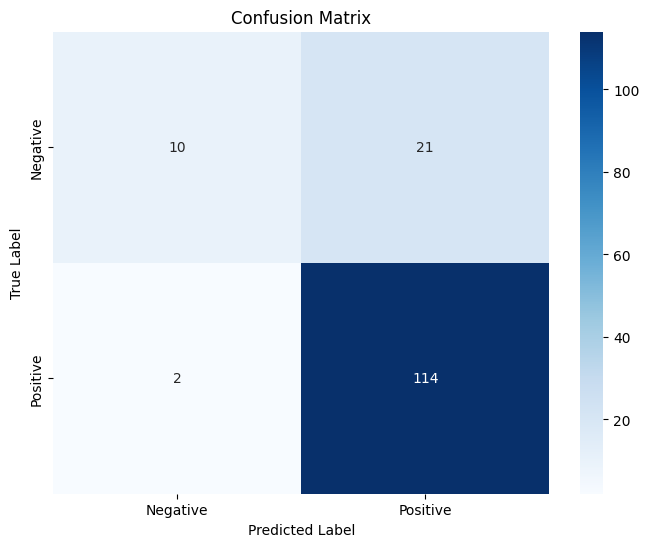

In [56]:
# Visualizing Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

# Creating heatmap for Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### The Random Forest Classifier achieved an accuracy of 84.35%, performing well in predicting positive sentiments with a recall of 99% and an F1-score of 91%. However, its performance on negative sentiments is weaker, with a recall of 29% and an F1-score of 44%, indicating room for improvement in identifying negative sentiments.